# Определение перспективного тарифа для телеком компании

## Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов

### Тариф «Смарт»
  
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
1. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
1. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### Описание данных  

Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных) 
* city — город проживания пользователя
* tariff — название тарифного плана
***
Таблица calls (информация о звонках):  
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок
***
Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение
***
Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя
***
Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv')

data_internet = pd.read_csv('/datasets/internet.csv', index_col = 0)

data_messages = pd.read_csv('/datasets/messages.csv')

data_tariffs = pd.read_csv('/datasets/tariffs.csv')

data_users = pd.read_csv('/datasets/users.csv')

In [3]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
data_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [5]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:
data_internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [7]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
data_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [9]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
data_tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
data_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


## Подготовьте данные

### Приведите данные к нужным типам:

 * Дата звонка - переведем в тип date_time
 * Продолжительность разговора округлим вверх и переведем в int

In [13]:
data_calls['duration'] = (np.ceil(data_calls['duration'])).astype('Int64')

In [14]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d', errors = 'coerce')

 * Дата сессии - переведем в тип date_time
 * Израсходованный траффик округлим вверх и переведем в int

In [15]:
data_internet['mb_used'] = np.ceil(data_internet['mb_used']).astype('Int64')

In [16]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d', errors = 'coerce')

* Дата сообщения - переведем в тип date_time

In [17]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d', errors = 'coerce')

 * Дата регистрации - переведем в тип date_time
 * Дата прекращения пользования тарифом переведем в тип date_time

In [18]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d', errors = 'coerce')

In [19]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d', errors = 'coerce')

### Найдите и исправьте ошибки в данных.

#### Звонки

In [20]:
data_calls['duration'].describe()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

В поле продолжительность есть звонки с нулем. От них не стоит избавляться, так как мы будем использовать разбивку помесячно, где эти значения уйдут, а если и не уйдут, значит клиент использовал другие услуги в пакете, при этом платя за тариф.

#### Интернет - трафик

In [21]:
data_internet['mb_used'].describe()

count    149396.000000
mean        370.622098
std         278.387019
min           0.000000
25%         139.000000
50%         349.000000
75%         560.000000
max        1725.000000
Name: mb_used, dtype: float64

В поле использованные мегабайты есть поля с нулем. От них не стоит избавляться. Есть значение в почти 2 гигобайта за сессию, похоже телефон использовали как модем.

#### Пользователи

В поле дата регистрации есть много NaN, следовательно пользователи остаются на этом тарифе на момент выгрузки, оставим данные так, не участвуют в анализе.

#### Тарифы

В полях объём интернет-трафика, включённого в абонентскую плату и использованный траффик указан данные в мегабайтах. А использованный сверх траффик считается за 1 гигобайт - необходимо учесть при вычислениях.

## Посчитать для каждого пользователя:

### Количество сделанных звонков и израсходованных минут разговора по месяцам

Создаем дополнительный столбец месяц использования услуги и группируем данные по id пользователя и месяцу

In [22]:
data_calls['per_month'] = data_calls['call_date'].dt.month_name()

In [23]:
calls_month = (data_calls.
pivot_table(index = ['user_id', 'per_month'], values = 'duration', aggfunc = ['count', 'sum'])
              )
calls_month.columns = ['count_calls','sum_min_calls']
calls_month['count_calls'] = calls_month['count_calls'].astype('Int64')

### Количество отправленных сообщений по месяцам

Создаем дополнительный столбец месяц использования услуги и группируем данные по id пользователя и месяцу

In [24]:
data_messages['per_month'] = data_messages['message_date'].dt.month_name()

In [25]:
messages_month = data_messages.pivot_table(index = ['user_id', 'per_month'], values = 'id', aggfunc = 'count')
messages_month.columns = ['count_messages']
messages_month['count_messages'] = messages_month['count_messages'].astype('Int64')

### Объем израсходованного интернет-трафика по месяцам

Создаем дополнительный столбец месяц использования услуги и группируем данные по id пользователя и месяцу

In [26]:
data_internet['per_month'] = data_internet['session_date'].dt.month_name()

In [27]:
internet_month = data_internet.pivot_table(index = ['user_id', 'per_month'], values = 'mb_used', aggfunc = 'sum')
internet_month.columns = ['sum_mb_used']

### Помесячную выручку с каждого пользователя 

Объединим сгруппированные таблицы по мультииндексам. Соединим, полученный датафрейм с таблицей пользователи, предварительно сбросив индексы.

In [28]:
data_month = calls_month.join(messages_month, how = 'outer')

data_month = data_month.join(internet_month, how = 'outer')

data_month.reset_index(inplace=True)

data_month = data_month.merge(data_users[['user_id','city','tariff']], on='user_id', how='inner')

Сравниваем использованные услуги со включенными в тариф (если меньше присваиваем 0), иначе умножаем на тариф за дополнительно использованные минуты, сообщения, траффик. Дополнительно использованные мегабайты округляем до гигобайта. Суммируем и добавляем плату за пакет.

In [29]:
def calculate_rev (i, m, t):
#-------------------------------звонки--------------------------------------------------
    if m['sum_min_calls'] > t.loc[i,'minutes_included']:
        
        not_free_min = (
        (m['sum_min_calls'] - t.loc[i,'minutes_included']) * t.loc[i,'rub_per_minute'])
        
    else:   
        not_free_min = 0
#-------------------------------сообщения--------------------------------------------------        
    if m['count_messages'] > t.loc[i,'messages_included']: 
        
        not_free_sms = (
        (m['count_messages'] - t.loc[i,'messages_included']) * t.loc[i,'rub_per_message'])
        
    else:     
        not_free_sms = 0
#-------------------------------траффик--------------------------------------------------        
    if m['sum_mb_used'] > t.loc[i,'mb_per_month_included']:
        
        not_free_inet = (
        np.ceil((m['sum_mb_used'] - t.loc[i,'mb_per_month_included']) / 1024)
            * t.loc[i,'rub_per_gb'])
        
    else:
        not_free_inet = 0
#-------------------------------сумма--------------------------------------------------       
    return (not_free_min + not_free_sms + not_free_inet + data_tariffs.loc[i,'rub_monthly_fee'])

Создаем функцию, которая исходя из тарифа будет запускать подсчет выручки. 

In [30]:
def revenue(month):
             
    if (month['tariff'] == 'smart'):
        
        return calculate_rev(0,month,data_tariffs)   
    else:
        return calculate_rev(1,month,data_tariffs)   
             

In [31]:
data_month['revenue'] = data_month.apply(revenue, axis=1).astype('int')

Устанавливаем мультииндексы обратно : по пользователю и месяцу

In [32]:
data_month.set_index(['user_id', 'per_month'], inplace=True)

In [33]:
data_month.head(10)

count_calls  sum_min_calls  count_messages  sum_mb_used  \
user_id per_month                                                            
1000    August              52            408              81        14070   
        December            46            333              70         9827   
        July                47            340              75        14016   
        June                43            172              60        23257   
        May                 22            159              22         2256   
        November            43            338              58        14768   
        October             57            350              73        14717   
        September           58            466              57        14581   
1001    December            63            414             NaN        14053   
        November            59            430             NaN        18452   

                        city tariff  revenue  
user_id per_month                             
1000    August     Краснодар  ultra     1950  
        December   Краснодар  ultra     1950  
        July       Краснодар  ultra     1950  
        June       Краснодар  ultra     1950  
        May        Краснодар  ultra     1950  
        November   Краснодар  ultra     1950  
        October    Краснодар  ultra     1950  
        September  Краснодар  ultra     1950  
1001    December      Москва  smart      550  
        November      Москва  smart     1350

### Посчитайте среднее количество, дисперсию и стандартное отклонение.

In [34]:
data_smart = data_month.query('tariff == "smart"')
data_ultra = data_month.query('tariff == "ultra"')
indicator = pd.DataFrame(columns = ['tariff','service','mean','var','std']).astype('object')
services = ['sum_min_calls','count_messages','sum_mb_used']

In [35]:
for ser in services:
    indicator.loc[services.index(ser)] = ['Smart', ser, np.mean(data_smart[ser]),
                 np.var(data_smart[ser], ddof=1), np.sqrt(np.var(data_smart[ser]))]

    
i = len(indicator) + 1
    
for ser in services:    
    indicator.loc[i] = ['Ultra', ser, np.mean(data_ultra[ser]),
                 np.var(data_ultra[ser], ddof=1), np.sqrt(np.var(data_ultra[ser]))]
    i += 1

In [36]:
indicator.set_index(['tariff','service'], inplace = True)
indicator

mean           var          std
tariff service                                                
Smart  sum_min_calls     419.062978  3.584419e+04   189.325618
       count_messages     38.716441  7.175942e+02    26.787949
       sum_mb_used     16236.472621  3.444310e+07  5868.824472
Ultra  sum_min_calls     545.451104  9.420342e+04   306.925754
       count_messages     61.161006  2.109659e+03    45.931026
       sum_mb_used     19686.767179  9.904344e+07  9952.057054

Разброс данных, по всем предоставляемым оператором услугам, в тарифе Ультра больше Смарт'а. Во многом это связано с тем, что тариф Смарт больше выбирают среднестатические пользователи. А контраст покупателей Ультра выше. 

#### Постройте гистограммы

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


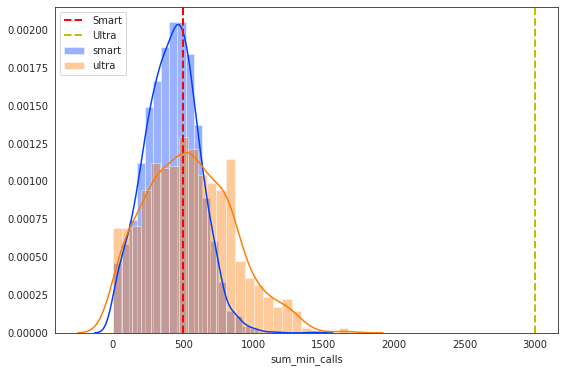

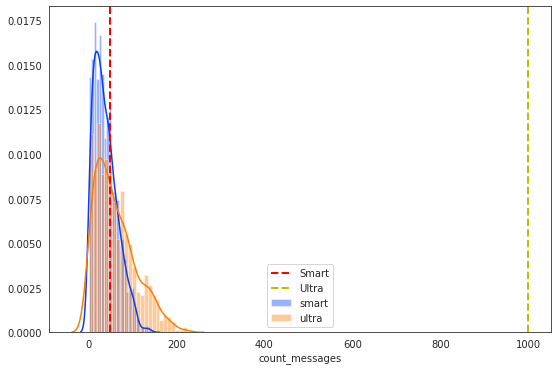

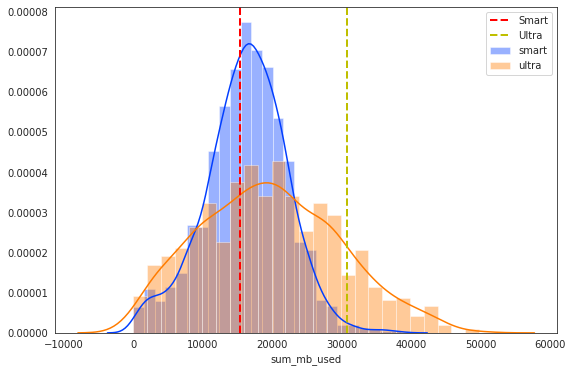

In [37]:
services = {'minutes_included' : 'sum_min_calls','messages_included' : 'count_messages','mb_per_month_included' : 'sum_mb_used'}
sns.set_style("white")
sns.set_palette("bright")
for key, value in services.items():
    plt.figure(figsize = (9,6))
    sns.distplot(data_smart[value], bins = 25, label = "smart")
    sns.distplot(data_ultra[value], bins = 25, label = "ultra")
    plt.axvline(x = data_tariffs.loc[0,key],linewidth=2, color='r', linestyle = '--', label = 'Smart')
    plt.axvline(x = data_tariffs.loc[1,key],linewidth=2, color='y', linestyle = '--', label = 'Ultra')
    plt.legend()
    plt.show();

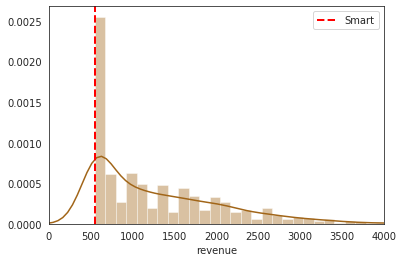

In [38]:
sns.set_style("white")
sns.set_palette("BrBG")
plt.xlim(0,4000)
sns.distplot(data_smart['revenue'], bins = 50)
plt.axvline(x = 550,linewidth=2, color='r', linestyle = '--', label = 'Smart')
plt.legend()
plt.show();

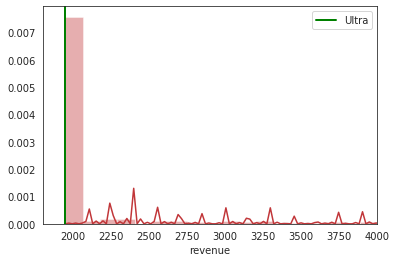

In [39]:
sns.set_style("white")
sns.set_palette("RdGy")
plt.xlim(1800,4000)
sns.distplot(data_ultra['revenue'], bins = 25)
plt.axvline(x = 1950, linewidth=2, color='g', linestyle = '-', label = 'Ultra')
plt.legend()
plt.show();

#### Звонки
Датасет с тарифом Смарт имеет небольшую отрицательную скошенность, 419 (среднее), 423 (медиана). А выборка с тарифом Ультра имеет небольшую положительную скошенность 545 (среднее), 528 (медиана).
#### Сообщения
Датасет с тарифом Смарт имеет положительную скошенность, 39 (среднее), 34 (медиана). А выборка с тарифом Ультра имеет положительную скошенность 61 (среднее) 51 (медиана).
#### Интернет-траффик
Датасет с тарифом Смарт имеет отрицательную скошенность, 16 236 (среднее), 16 532 (медиана). А выборка с тарифом Ультра имеет положительную скошенность 19 687 (среднее) 19 411 (медиана).

## Проверьте гипотезы

Так как в заданных гипотезах нам необходимо проверить равенство средних двух выборок не зависимых между собой, выберем метод scipy.stats.ttest_ind, при этом, дисперсии двух выборок примерно равны - взяты из одной совокупности.

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

#### Нулевую гипотезу H₀ выдвигаем следующим образом : средние выручки обоих тарифов равны. 
#### Альтернативную гипотезу H₁ выдвигаем следующим образом : средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. 

In [40]:
alpha = .05 

results_tariff = st.ttest_ind(
    data_smart['revenue'], 
    data_ultra['revenue'])

display('p-значение:', results_tariff.pvalue)

if (results_tariff.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

2.9776448000521676e-158

'Отвергаем нулевую гипотезу'

Исходя из сравнения средних двух выборок вероятность слишком низка, что выручки от обоих тарифов равны.

In [41]:
display(data_smart['revenue'].mean(),
data_ultra['revenue'].mean())

1294.6393001345896

2071.0659898477156

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

#### Нулевую гипотезу H₀ выдвигаем следующим образом : средние выручки от пользователей в Москве и регионах  равны. 
#### Альтернативную гипотезу H₁ выдвигаем следующим образом : средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [42]:
alpha = .05 

results_city = st.ttest_ind(
    data_month.query('city == "Москва"')['revenue'], 
    data_month.query('city != "Москва"')['revenue'])

display('p-значение:', results_city.pvalue)

if (results_city.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

0.531666503831252

'Не получилось отвергнуть нулевую гипотезу'

На каждую пару клиентов Москва/Регионы, у которых средние выручки различаются приходится пара, у которых эти выручки равны, очень большая вреоятность, чтобы не воспринимать нулевую гипотезу.

## Общий вывод

### В ходе анализа тарифных планов: «Смарт» и «Ультра» сотовой компании "Мегалайн":
###### Подготовили данные
###### Посчитали для каждого пользователя:
   * количество сделанных звонков и израсходованных минут разговора по месяцам;
   * количество отправленных сообщений по месяцам;
   * объем израсходованного интернет-трафика по месяцам;
   * помесячную выручку с каждого пользователя
   
##### Проанализировали данные:
   * поведение клиентов оператора, исходя из выборки.
   * построили гистограммы
   
##### Проверили гипотезы:
   * средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
   * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

#### Исходя из выборки данных можно сделать следующие предварительные выводы. 
#### При том, что распределения по услугам для двух тарифов не имеют большой скошенности в одну из сторон, разброс относительно среднего у тарифа 'Ультра' выше, выручка по нему, согласно выборке больше. 
#### Учитывая вероятность равенства средней выручки Москвы и Регионов (0,53), стоит развивать тариф Ультра в регионах.